In [1]:
import pandas as pd
from sklearn import linear_model

#https://seaborn.pydata.org/installing.html
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [2]:
# Load the datasets
tesla_stocks_df = pd.read_csv('../Data/daily_return_day.csv',index_col='date')
tsdf=tesla_stocks_df.copy(deep=True)

elon_musk_df = pd.read_csv('../Data/avg_tweet_sent_score_day.csv', index_col='date')
emdf=elon_musk_df.copy(deep=True)

print("Tesla Stocks Dataframe Head is: \n")
print(tsdf.head())
print("Elon Musk Dataframe Head is: \n")
print(emdf.head())

print("Tesla Stocks Dataframe Count is: \n")
print(tsdf.count())
print("Elon Musk Dataframe Count is: \n")
print(emdf.count())

Tesla Stocks Dataframe Head is: 

            daily_return
date                    
2015-02-02      0.034172
2015-02-03      0.024107
2015-02-04      0.001191
2015-02-05      0.005048
2015-02-06     -0.020901
Elon Musk Dataframe Head is: 

            avg_sent_score
date                      
2015-02-08        0.147743
2015-02-10       -0.035833
2015-02-11        0.202656
2015-02-12        0.000000
2015-02-24        0.500000
Tesla Stocks Dataframe Count is: 

daily_return    1371
dtype: int64
Elon Musk Dataframe Count is: 

avg_sent_score    1359
dtype: int64


In [3]:
#https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe
date_idx = pd.date_range('02-01-2015', '07-14-2020')


tsdf.index = pd.DatetimeIndex(tsdf.index)

tsdf = tsdf.reindex(date_idx, fill_value=0)

emdf.index = pd.DatetimeIndex(emdf.index)

emdf = emdf.reindex(date_idx, fill_value=0)

print("Tesla Stocks Dataframe Head is: \n")
print(tsdf.head())
print("Elon Musk Dataframe Head is: \n")
print(emdf.head())

print("Tesla Stocks Dataframe Count is: \n")
print(tsdf.count())
print("Elon Musk Dataframe Count is: \n")
print(emdf.count())






Tesla Stocks Dataframe Head is: 

            daily_return
2015-02-01      0.000000
2015-02-02      0.034172
2015-02-03      0.024107
2015-02-04      0.001191
2015-02-05      0.005048
Elon Musk Dataframe Head is: 

            avg_sent_score
2015-02-01             0.0
2015-02-02             0.0
2015-02-03             0.0
2015-02-04             0.0
2015-02-05             0.0
Tesla Stocks Dataframe Count is: 

daily_return    1991
dtype: int64
Elon Musk Dataframe Count is: 

avg_sent_score    1991
dtype: int64


In [4]:
print("Tesla Stocks Dataframe Value Count is: \n")
print(tsdf.value_counts())
print("Elon Musk Dataframe Value Count is: \n")
print(emdf.value_counts())

Tesla Stocks Dataframe Value Count is: 

daily_return
 0.000000       621
 0.001620         2
-0.107572         1
 0.008323         1
 0.008756         1
               ... 
-0.008054         1
-0.008065         1
-0.008069         1
-0.008070         1
 0.157802         1
Name: count, Length: 1370, dtype: int64
Elon Musk Dataframe Value Count is: 

avg_sent_score
0.000000          779
0.250000           21
0.500000           19
0.200000           13
0.050000           13
                 ... 
0.088135            1
0.088214            1
0.089250            1
0.089444            1
0.121225            1
Name: count, Length: 924, dtype: int64


0.0005592277667488821


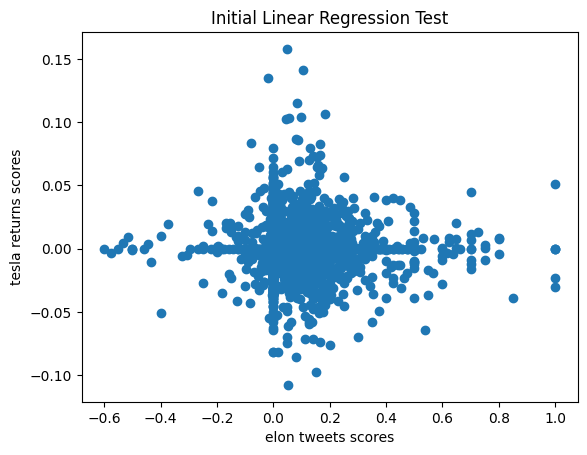

In [13]:
#https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
reg = linear_model.LinearRegression()
#.fit(x_train,y_train)
#reg.fit(emdf.avg_sent_score,tsdf.daily_return)
#.reshape(-1, 1)
reg.fit(emdf,tsdf)

print(reg.score(emdf, tsdf))

plt.scatter(x=emdf,y=tsdf,)
plt.xlabel('elon tweets scores')
plt.ylabel('tesla returns scores')
plt.title("Initial Linear Regression Test")
plt.show()

In [6]:
tsdf.to_csv('../Data/daily_return_day_padded.csv')

emdf.to_csv('../Data/avg_tweet_sent_score_day_padded.csv')

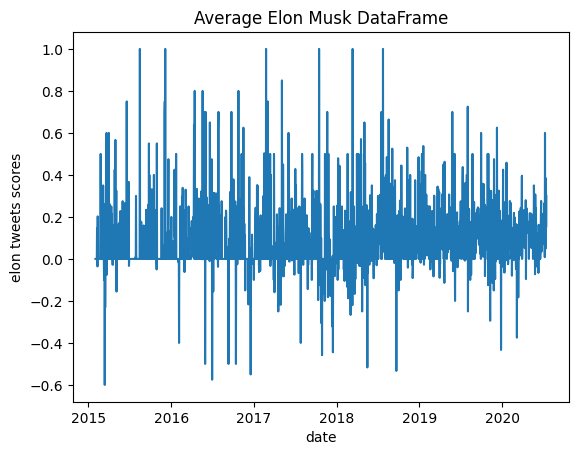

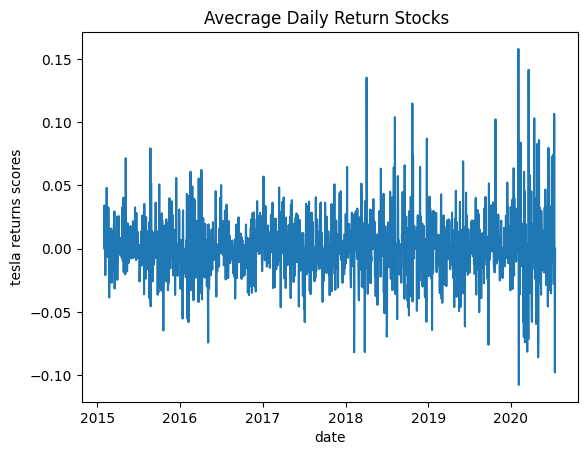

In [11]:
plt.plot(emdf.index,emdf,)
plt.xlabel('date')
plt.ylabel('elon tweets scores')
plt.title("Average Elon Musk DataFrame")
plt.show()

plt.plot(tsdf.index,tsdf,)
plt.xlabel('date')
plt.ylabel('tesla returns scores')
plt.title("Avecrage Daily Return Stocks ")
plt.show()

In [8]:
#https://towardsdatascience.com/the-complete-guide-to-time-series-forecasting-using-sklearn-pandas-and-numpy-7694c90e45c1


tsdf2 = tsdf.shift(1)
print(tsdf2.head())
tsdf2.at['2015-02-01','daily_return']=0
tsdf2.fillna(0)

            daily_return
2015-02-01           NaN
2015-02-02      0.000000
2015-02-03      0.034172
2015-02-04      0.024107
2015-02-05      0.001191


,daily_return
2015-02-01,0.000000
2015-02-02,0.000000
2015-02-03,0.034172
2015-02-04,0.024107
2015-02-05,0.001191
...,...
2020-07-10,-0.001940
2020-07-11,0.106483
2020-07-12,0.000000
2020-07-13,0.000000


0.0001548850794254042


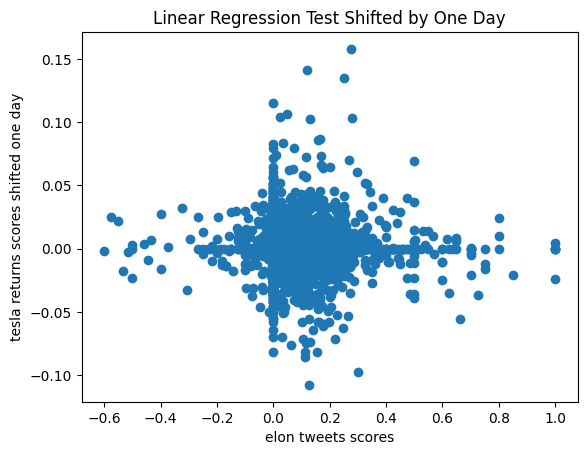

In [17]:
#https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
reg2 = linear_model.LinearRegression()
#.fit(x_train,y_train)
#reg.fit(emdf.avg_sent_score,tsdf.daily_return)
#.reshape(-1, 1)
reg2.fit(emdf,tsdf2)

print(reg2.score(emdf, tsdf2))

plt.scatter(x=emdf,y=tsdf2,)
plt.xlabel('elon tweets scores')
plt.ylabel('tesla returns scores shifted one day')
plt.title("Linear Regression Test Shifted by One Day")
plt.show()